In [26]:
#import all necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [27]:
#Import the Iris data
data = pd.read_csv(r'C:\Users\ABHIGYAN\Desktop\Sparks Foundation\Iris.csv')

In [28]:
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [29]:
data = data.drop(columns=["Id"])
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [30]:
data.describe()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [31]:
data["Species"].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [32]:
#plotting data
colors = ["red","green","blue"]
species = ["Iris-versicolor","Iris-setosa","Iris-virginica"]

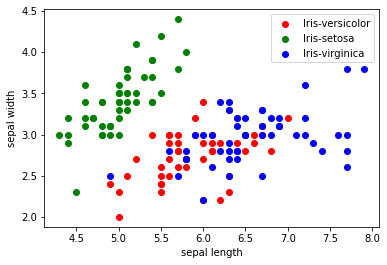

In [33]:
for i in range(3):
    t = data[data["Species"] == species[i]]
    plt.scatter(t["SepalLengthCm"],t["SepalWidthCm"], color = colors[i], label = species[i])
    
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.legend()

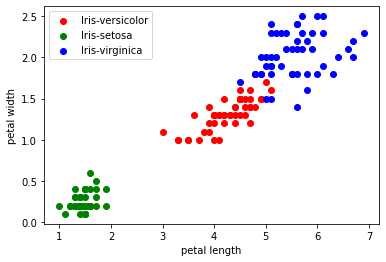

In [34]:
for i in range(3):
    t = data[data["Species"] == species[i]]
    plt.scatter(t["PetalLengthCm"],t["PetalWidthCm"], color = colors[i], label = species[i])
    
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.legend()

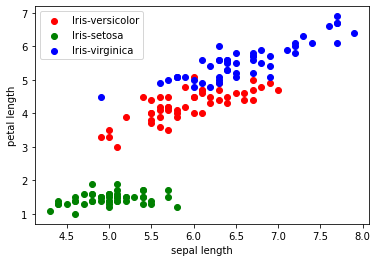

In [35]:
for i in range(3):
    t = data[data["Species"] == species[i]]
    plt.scatter(t["SepalLengthCm"],t["PetalLengthCm"], color = colors[i], label = species[i])
    
plt.xlabel("sepal length")
plt.ylabel("petal length")
plt.legend()

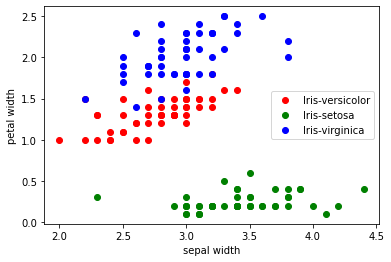

In [36]:
for i in range(3):
    t = data[data["Species"] == species[i]]
    plt.scatter(t["SepalWidthCm"],t["PetalWidthCm"], color = colors[i], label = species[i])
    
plt.xlabel("sepal width")
plt.ylabel("petal width")
plt.legend()

In [37]:
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


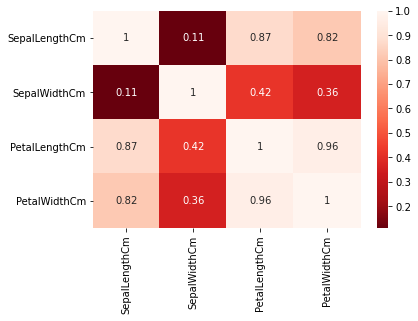

In [38]:
#plotting heat map
sns.heatmap(abs(data.corr()), cmap = 'Reds_r', annot = True)

In [43]:
#building KMeans model
ccw=[]
from sklearn.cluster import KMeans
for i in range(1,10):
    kmeans = KMeans(n_jobs=-1, n_clusters = i, init = 'k-means++')
    kmeans.fit(data.iloc[:,[0,1,2,3]])
    ccw.append(kmeans.inertia_)

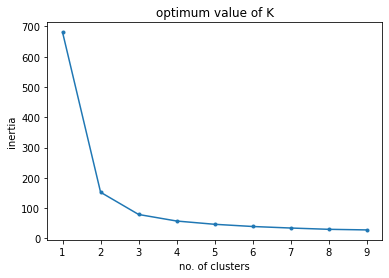

In [44]:
#finding optimal value of k using elbow method
df = pd.DataFrame({'clusters':range(1,10), 'CCW':ccw})
plt.plot(df["clusters"],df["CCW"], marker='.')
plt.xlabel("no. of clusters")
plt.ylabel("inertia")
plt.title("optimum value of K")
plt.show()

In [45]:
#from above we get to know that optimal value of k must be 3
kmeans = KMeans(n_jobs=-1, n_clusters = 3, init = 'k-means++')
kmeans.fit(data.iloc[:,[0,1,2,3]])
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [46]:
#adding a new column in existing table

data['Clusters'] = kmeans.labels_
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Clusters
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,0
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


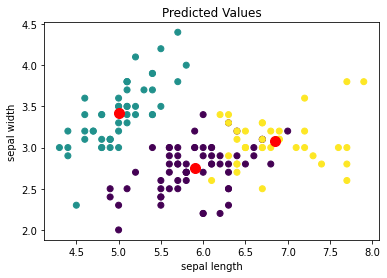

In [53]:
#plotting the predicted data...

plt.scatter(data['SepalLengthCm'], data['SepalWidthCm'],c=data.Clusters)
plt.title("Predicted Values")
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], color = 'red', label = 'centroids', s = 100)
plt.show()

In [55]:
#checking the accuracy of the model
#first convert the species into encoded values

data['original_species'] = data['Species'].apply(lambda x:1 if x=='Iris-setosa' else 2 if x=='Iris-virginica' else 0)
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Clusters,original_species
0,5.1,3.5,1.4,0.2,Iris-setosa,1,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1,1
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2,2
146,6.3,2.5,5.0,1.9,Iris-virginica,0,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2,2


In [57]:
# now last step is checking for accuracy of model

from sklearn.metrics import classification_report
z = classification_report(data['original_species'], data['Clusters'])
print(z)    

              precision    recall  f1-score   support

           0       0.77      0.96      0.86        50
           1       1.00      1.00      1.00        50
           2       0.95      0.72      0.82        50

    accuracy                           0.89       150
   macro avg       0.91      0.89      0.89       150
weighted avg       0.91      0.89      0.89       150

